### 1.2 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기 ###

In [1]:
import pandas as pd

file_path = "data/data/chipotle.tsv"
chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
print("---------------------------------")
print(chipo.info())

(4622, 5)
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [2]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [3]:
# order_id 의 숫자 데이터들을 문자열화
chipo["order_id"] = chipo["order_id"].astype(str)

In [4]:
# 기초 통게량
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [5]:
print(len(chipo["order_id"].unique()))

1834


In [6]:
chipo["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [7]:
item_count = chipo["item_name"].value_counts()[:10]
for idx, (name, cnt) in enumerate(item_count.iteritems()) :
    print("Top", idx, " : ", name, cnt)

Top 0  :  Chicken Bowl 726
Top 1  :  Chicken Burrito 553
Top 2  :  Chips and Guacamole 479
Top 3  :  Steak Burrito 368
Top 4  :  Canned Soft Drink 301
Top 5  :  Steak Bowl 211
Top 6  :  Chips 211
Top 7  :  Bottled Water 162
Top 8  :  Chicken Soft Tacos 115
Top 9  :  Chips and Fresh Tomato Salsa 110


In [8]:
# 아이템별 주문 개수

order_count = chipo.groupby("item_name")["order_id"].count()
order_count.head(10)

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [9]:
# 아이템별 주문 수량

item_quantity = chipo.groupby("item_name")["quantity"].sum()
item_quantity.head(10)

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

Text(0.5, 1.0, 'Distribution of all ordered item')

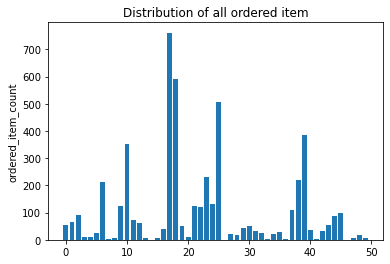

In [10]:
# 시각화

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align="center")
plt.ylabel("ordered_item_count")
plt.title("Distribution of all ordered item")

In [11]:
# 데이터 전처리

print(chipo.info())
print("---------------------")
chipo["item_price"].head() # "$" 기호에 의해 문자열 취급됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
---------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [12]:
chipo["item_price"] = chipo["item_price"].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [13]:
# 주문당  1인 평균 금액 계산

chipo.groupby("order_id")["item_price"].sum().mean()

18.811428571428717

In [14]:
# 한 주문에 10달러 이상 지불한 주문 번호 출력

chipo_orderid_group = chipo.groupby("order_id")["item_price"].sum()
chipo_orderid_group

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [15]:
results = chipo_orderid_group[chipo_orderid_group >= 10]
results

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [17]:
print(results[:10])
print(results.index.values)

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
1002    10.68
1003    13.00
1004    21.96
1005    12.15
1006    71.40
Name: item_price, dtype: float64
['1' '10' '100' ... '997' '998' '999']


In [25]:
# 각 아이템 가격 구하기

chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby("item_name").min()
price_per_item.sort_values(by="item_price", ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [26]:
# item 가격

item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item["item_price"].tolist()

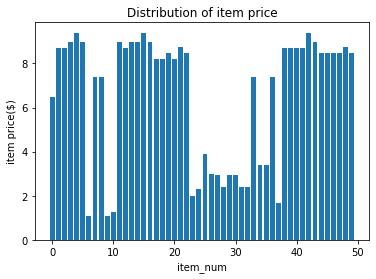

In [27]:
plt.bar(x_pos, item_price, align='center')
plt.ylabel("item price($)")
plt.xlabel("item_num")
plt.title("Distribution of item price")
plt.show()

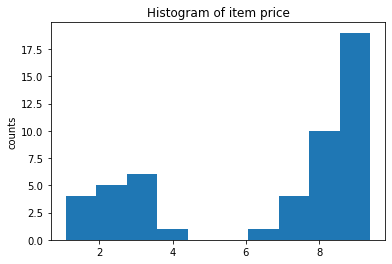

In [28]:
# 아이템 가격 히스토그램

plt.hist(item_price)
plt.ylabel("counts")
plt.title("Histogram of item price")
plt.show()

In [30]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

chipo.groupby("order_id").sum().sort_values(by="item_price", ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


In [33]:
# Veggie Salad Bowl 이 몇 번 주문되었는지 구하기

chipo_salad = chipo[chipo["item_name"] == "Veggie Salad Bowl"].drop_duplicates()
print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [45]:
# Chicken Bowl 을 2개 이상 주문한 횟수 구하기

chipo_chicken = chipo[chipo["item_name"] == "Chicken Bowl"]
chipo_chicken = chipo_chicken.groupby("order_id").sum()["quantity"]
chipo_chicken_result = chipo_chicken[chipo_chicken >= 2]
len(chipo_chicken_result)

114